In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures, LabelEncoder,  FunctionTransformer
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pickle

file_path = 'data_cleaned.csv'

data = pd.read_csv(file_path)

X = data.drop('charges', axis=1)
y = data['charges']



In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])
# 80% pour train et 20% de test

print("Train set X", X_train.shape)
print("Train set Y", y_train.shape)
print("Test set X", X_test.shape)
print("Test set Y", y_test.shape)

Train set X (1136, 6)
Train set Y (1136,)
Test set X (201, 6)
Test set Y (201,)


In [11]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures
# from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import FunctionTransformer
# from preprocess_data import preprocess_data
# # def preprocess_data(data):
# #     # Initialiser l'encodeur de labels pour la conversion des données catégorielles
# #     label_encoder = LabelEncoder()

# #     # Convertir les colonnes 'sex' et 'smoker' en valeurs entières
# #     columns_to_encode = ['sex', 'smoker']
# #     for column in columns_to_encode:
# #         data[column] = label_encoder.fit_transform(data[column])  # Encodage des colonnes

# #     # Créer des variables binaires avec des noms explicites pour la colonne 'region'
# #     region_dummies_named = pd.get_dummies(data['region'], prefix='is', prefix_sep='_')

# #     # Concaténer ces variables binaires avec le DataFrame original
# #     data_with_named_dummies = pd.concat([data, region_dummies_named], axis=1)

# #     # Préparation de l'ensemble des caractéristiques (X) et de la variable cible (y)
# #     X = data_with_named_dummies.drop('charges', axis=1)  # Ensemble des caractéristiques
# #     y = data_with_named_dummies['charges']  # Variable cible

# #     # Création d'une colonne binaire pour le statut de fumeur
# #     X['smoker_binary'] = (X['smoker'] == 1).astype(int)

# #     # Définition des intervalles pour les catégories de BMI
# #     bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]  # Limites des catégories
# #     labels = ['underweight', 'normal weight', 'overweight', 'obesity class I', 'obesity class II', 'obesity class III']

# #     # Utilisation de pd.cut pour créer de nouvelles colonnes basées sur les catégories de BMI
# #     X['BMI_category'] = pd.cut(X['bmi'], bins=bins, labels=labels, right=False)

# #     # Utilisation de pd.get_dummies pour obtenir des colonnes binaires pour chaque catégorie de BMI
# #     BMI_dummies = pd.get_dummies(X['BMI_category'])

# #     # Ajout de ces colonnes binaires au DataFrame X
# #     X = pd.concat([X, BMI_dummies], axis=1)

# #     # Suppression des colonnes temporaires
# #     # X = X.drop(['smoker_binary', 'BMI_category'], axis=1)

# #     return X, y

# # Exemple d'utilisation
# data = pd.read_csv('data_cleaned.csv')  # Remplacez 'votre_fichier.csv' par le chemin vers votre fichier de données
# X, y = preprocess_data(data)
# X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])

# # Identifier les colonnes catégorielles et numériques
# numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
# categorical_cols = X.select_dtypes(include=['object']).columns

# # Créer le pipeline pour les caractéristiques numériques
# numerical_pipeline = Pipeline([
#     ('scaler', StandardScaler())
# ])

# # Créer le pipeline pour les caractéristiques catégorielles
# categorical_pipeline = Pipeline([
#     ('encoder', OneHotEncoder())
# ])

# # Combinez les pipelines en utilisant ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('numerical', numerical_pipeline, numerical_cols),
#         ('categorical', categorical_pipeline, categorical_cols)
#     ])

# # Créez le pipeline final en ajoutant le modèle
# LR_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('poly', PolynomialFeatures(2)),
#     ('regression', LinearRegression())
# ])

# Lasso_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('poly', PolynomialFeatures(2)),
#     ('Lasso', Lasso())
# ])

# ElasticNet_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('poly', PolynomialFeatures(2)),
#     ('ElasticNet', ElasticNet())
# ])

# # Assurez-vous d'avoir les données de train et de test (X_train, X_test, y_train, y_test) avant d'utiliser fit et score
# # ElasticNet_pipeline.fit(X_train, y_train)
# # ElasticNet_pipeline.score(X_test, y_test)
# num_cols = len(X.columns)
# print(f"Nombre de colonnes : {num_cols}")

# # Afficher les intitulés des colonnes
# col_names = X.columns.tolist()
# print("Intitulés des colonnes :", col_names)

# # Afficher le score sur les données de test pour ElasticNet
# ElasticNet_pipeline.fit(X_train, y_train)
# score = ElasticNet_pipeline.score(X_test, y_test)
# print(f"Score sur les données de test ElasticNet: {score}")

# # Afficher le score sur les données de test pour Lasso
# Lasso_pipeline.fit(X_train, y_train)
# score = Lasso_pipeline.score(X_test, y_test)
# print(f"Score sur les données de test Lasso: {score}")

# # Afficher le score sur les données de test pour Linear Regression
# LR_pipeline.fit(X_train, y_train)
# score = LR_pipeline.score(X_test, y_test)
# print(f"Score sur les données de test Linear Regression: {score}")

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from preprocess_data import preprocess_data

# def preprocess_data(X):
#     # Initialiser l'encodeur de labels pour la conversion des données catégorielles
#     label_encoder = LabelEncoder()

#     # Convertir les colonnes 'sex' et 'smoker' en valeurs entières
#     columns_to_encode = ['sex', 'smoker']
#     for column in columns_to_encode:
#         X[column] = label_encoder.fit_transform(X[column])  # Encodage des colonnes

#     # Créer des variables binaires avec des noms explicites pour la colonne 'region'
#     region_dummies_named = pd.get_dummies(X['region'], prefix='is', prefix_sep='_')

#     # Concaténer ces variables binaires avec le DataFrame original
#     X_with_named_dummies = pd.concat([X, region_dummies_named], axis=1)

#     # Création d'une colonne binaire pour le statut de fumeur
#     X_with_named_dummies['smoker_binary'] = (X_with_named_dummies['smoker'] == 1).astype(int)

#     # Définition des intervalles pour les catégories de BMI
#     bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]  # Limites des catégories
#     labels = ['underweight', 'normal weight', 'overweight', 'obesity class I', 'obesity class II', 'obesity class III']

#     # Utilisation de pd.cut pour créer de nouvelles colonnes basées sur les catégories de BMI
#     X_with_named_dummies['BMI_category'] = pd.cut(X_with_named_dummies['bmi'], bins=bins, labels=labels, right=False)

#     # Utilisation de pd.get_dummies pour obtenir des colonnes binaires pour chaque catégorie de BMI
#     BMI_dummies = pd.get_dummies(X_with_named_dummies['BMI_category'])

#     # Ajout de ces colonnes binaires au DataFrame X
#     X_processed = pd.concat([X_with_named_dummies, BMI_dummies], axis=1)

#     # Suppression des colonnes temporaires si nécessaire
#     # X_processed = X_processed.drop(['smoker_binary', 'BMI_category'], axis=1)
#     num_cols = len(X_processed.columns)
#     # print(f"Nombre de colonnes : {num_cols}")
#     return X_processed

data = pd.read_csv('data_cleaned.csv')  # Remplacez 'votre_fichier.csv' par le chemin vers votre fichier de données
X = data.drop('charges', axis=1)  # Ensemble des caractéristiques
y = data['charges'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['smoker'])
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
# Créer le pipeline final en ajoutant le modèle
LR_pipeline = make_pipeline(
    FunctionTransformer(preprocess_data),
    ColumnTransformer(
        transformers=[
            ('numerical', StandardScaler(), numerical_cols),
            ('categorical', OneHotEncoder(), categorical_cols)
        ]
    ),
    PolynomialFeatures(2),
    LinearRegression()
)

Lasso_pipeline = make_pipeline(
    FunctionTransformer(preprocess_data),
    ColumnTransformer(
        transformers=[
            ('numerical', StandardScaler(), numerical_cols),
            ('categorical', OneHotEncoder(), categorical_cols)
        ]
    ),
    PolynomialFeatures(2),
    Lasso()
)

ElasticNet_pipeline = make_pipeline(
    FunctionTransformer(preprocess_data),
    ColumnTransformer(
        transformers=[
            ('numerical', StandardScaler(), numerical_cols),
            ('categorical', OneHotEncoder(), categorical_cols)
        ]
    ),
    PolynomialFeatures(2),
    ElasticNet()
)

# Assurez-vous d'avoir les données de train et de test (X_train, X_test, y_train, y_test) avant d'utiliser fit et score
num_cols = len(X.columns)
print(f"Nombre de colonnes : {num_cols}")

# Afficher les intitulés des colonnes
col_names = X.columns.tolist()
print("Intitulés des colonnes :", col_names)

# Afficher le score sur les données de test pour ElasticNet
ElasticNet_pipeline.fit(X_train, y_train)
scoreEN = ElasticNet_pipeline.score(X_test, y_test)
print(f"Score sur les données de test ElasticNet: {scoreEN}")

# Afficher le score sur les données de test pour Lasso
Lasso_pipeline.fit(X_train, y_train)
scoreLASSO = Lasso_pipeline.score(X_test, y_test)
print(f"Score sur les données de test Lasso: {scoreLASSO}")

# Afficher le score sur les données de test pour Linear Regression
LR_pipeline.fit(X_train, y_train)
scoreLR = LR_pipeline.score(X_test, y_test)
print(f"Score sur les données de test Linear Regression: {scoreLR}")
# print(X_test)
# print(ElasticNet_pipeline.predict(X_test))

Nombre de colonnes : 6
Intitulés des colonnes : ['age', 'sex', 'bmi', 'children', 'smoker', 'region']
Score sur les données de test ElasticNet: 0.775611516884202
Score sur les données de test Lasso: 0.8994826817076036
Score sur les données de test Linear Regression: 0.8992688947035343


Recherche des meilleurs hyperparamètres de ElasticNet
Affichage du score, qui est le meilleur résultat

In [13]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'elasticnet__alpha': np.arange(0.01, 0.3, 0.1),
    'elasticnet__l1_ratio': np.arange(0.5, 0.9, 0.01)
}

grid = GridSearchCV(ElasticNet_pipeline, param_grid, cv=5)

grid.fit(X_train, y_train)
print(grid.best_params_)
model = grid.best_estimator_
print(model.score(X_test, y_test))

{'elasticnet__alpha': 0.11, 'elasticnet__l1_ratio': 0.8500000000000003}
0.9009554665776133


Export du model pour l'utiliser avec streamlit

In [14]:
print(X_test)

      age  sex     bmi  children  smoker     region
490    19    0  32.900         0       0  southwest
1206   36    1  33.400         2       1  southwest
704    33    0  32.900         2       0  southwest
312    43    1  35.970         3       1  southeast
57     18    1  31.680         2       1  southeast
...   ...  ...     ...       ...     ...        ...
1336   61    0  29.070         0       1  northwest
764    57    0  31.825         0       0  northwest
303    28    0  33.000         2       0  southeast
292    25    1  45.540         2       1  southeast
582    32    0  23.650         1       0  southeast

[201 rows x 6 columns]


In [15]:
# Sauvegarder le modèle dans un fichier .pkl
with open('exportModel.pkl', 'wb') as file:
    pickle.dump(ElasticNet_pipeline, file)

with open('exportR2.pkl', 'wb') as file:
    pickle.dump(model.score(X_test, y_test), file)

Ce code trace une courbe d'apprentissage pour notre modèle ElasticNet. Les zones ombragées autour des lignes représentent l'intervalle de confiance des scores. Si les courbes convergent et que les scores de validation augmentent avec plus de données, c'est un bon signe. En revanche, si les courbes restent éloignées l'une de l'autre, cela peut indiquer un overfitting.

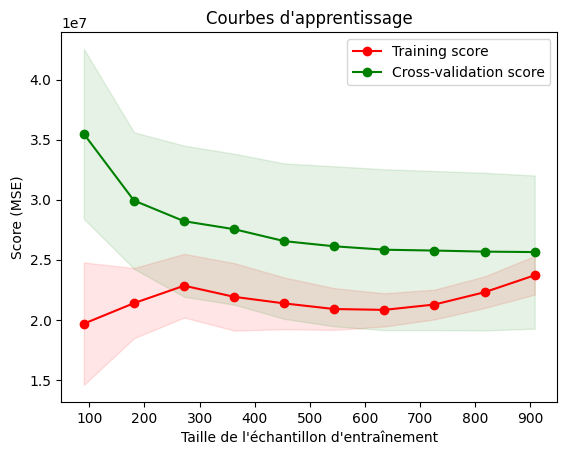

In [16]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Définir les intervalles pour la taille de l'échantillon d'entraînement
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculer les courbes d'apprentissage
train_sizes, train_scores, validation_scores = learning_curve(
    grid.best_estimator_, X_train, y_train, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error'
)

# Calculer la moyenne et l'écart-type des scores d'entraînement et de validation
train_scores_mean = -train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
validation_scores_mean = -validation_scores.mean(axis=1)
validation_scores_std = validation_scores.std(axis=1)

# Tracer les courbes d'apprentissage
plt.figure()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Courbes d'apprentissage")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Score (MSE)")
plt.legend(loc="best")
plt.show()
